# Comparison of online CCA algorithms on synthetic sources

### Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from cca_algorithms import bio_cca
from util import correlation_matrix, max_objective, error, constraint_error, add_fill_lines

### Dataset

In [28]:
dataset = 'synthetic'

### Load synthetic dataset

In [29]:
X = np.load(f'datasets/{dataset}/view1.npy')
Y = np.load(f'datasets/{dataset}/view2.npy')

x_dim = X.shape[0]
y_dim = Y.shape[0]
samples = X.shape[1]

### Offline solution

In [30]:
# Covariance matrices

Cxx = X@X.T/samples
Cyy = Y@Y.T/samples
Cxy = X@Y.T/samples

In [31]:
# Correlation matrix

Rxy = correlation_matrix(Cxx, Cyy, Cxy)

### Plot canonical correlations

In [32]:
u, s, vh = np.linalg.svd(Rxy)

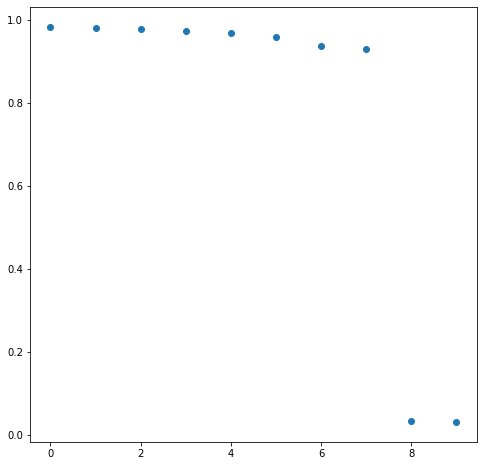

In [33]:
fig = plt.figure(figsize=(8,8))

plt.plot(s[0:10], 'o')
plt.show()

### Online algorithms

In [34]:
z_dim = 1; trials = 1

biocca_err = np.zeros((trials,samples))
msgcca_err = np.zeros((trials,samples))
genoja_err = np.zeros((trials,samples))

In [35]:
for i_trial in range(trials):
    
    print(f'Trial {i_trial+1} of out {trials}:')
    
    # Random permutation of the inputs

    idx = np.random.permutation(samples)
    
    # Initialize algorithm
    
    biocca = bio_cca(z_dim,x_dim,y_dim,dataset)
    
    biocca_Vx = np.zeros((samples,x_dim,z_dim))
    biocca_Vy = np.zeros((samples,y_dim,z_dim))
    biocca_err = np.zeros((trials,samples))
    biocca_constraint_err = np.zeros((trials,samples))
    
    # Run online algorithms
    
    print('Running online algorithms...')
    
    for i_sample in range(samples):

        x = X[:,idx[i_sample]]
        y = Y[:,idx[i_sample]]
        
        biocca_Vx[i_sample], biocca_Vy[i_sample] = biocca.fit_next(x,y)
        
    # Compute error
                
    print('Computing errors...')

    for i_sample in range(samples):
        biocca_err[i_trial,i_sample] = error(biocca_Vx[i_sample], biocca_Vy[i_sample], Cxx, Cyy, Cxy)
        biocca_constraint_err[i_trial,i_sample] = constraint_error(biocca_Vx[i_sample], biocca_Vy[i_sample], Cxx, Cyy)

Trial 1 of out 1:
Running online algorithms...
Computing errors...


### Comparison plots

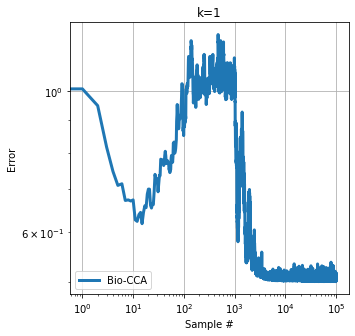

In [36]:
linewidth = 3

t = list(range(samples))

fig = plt.figure(figsize=(5,5))

ax = plt.subplot(1, 1, 1)

add_fill_lines(ax, t, biocca_err, plot_kwargs={'ls': '-', 'lw': linewidth, 'label': 'Bio-CCA'})

ax.loglog()

plt.title(f"k={z_dim}")
plt.grid()
plt.legend(loc = 'lower left')
plt.xlabel('Sample #')
plt.ylabel('Error')

plt.show()